In [1]:
import category_encoders as ce
import numpy as np
import pandas as pd

from sklearn.linear_model import PassiveAggressiveClassifier,PassiveAggressiveRegressor
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingRegressor, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
def positive_negative (v):
    if float(v) >= 0:
        return 1
    else:
        return 0

In [24]:
df_data_reg = pd.read_csv('GapUpDown_Training_7Var.csv', header=0, encoding='ascii', engine='python')

df_data = pd.read_csv('GapUpDown_Training_7Var.csv', header=0, encoding='ascii', engine='python')
df_data['Pchange'] = df_data['Pchange'].map(positive_negative)

In [25]:
print(df_data.head())
len(df_data)

print(df_data_reg.head())
len(df_data_reg)

          Mcap  Float      Gap0      Gap1  Pchange1  V_1_Float   V_Float  \
0   416.295000  12.93  0.983655  0.442149  0.928367   0.656729  0.402707   
1  1603.181979  52.28  0.984127 -0.066351 -0.200508   0.001503  0.010788   
2   122.760000   1.61  0.270103  0.364679 -0.184874   1.137329  0.567702   
3   453.320000   9.16  0.729508 -0.007576 -0.068702   0.006987  0.349913   
4  1735.233023  45.86  0.739130  0.012121 -0.035928   0.000052  0.020403   

   Pchange  
0        0  
1        0  
2        0  
3        0  
4        0  
          Mcap  Float      Gap0      Gap1  Pchange1  V_1_Float   V_Float  \
0   416.295000  12.93  0.983655  0.442149  0.928367   0.656729  0.402707   
1  1603.181979  52.28  0.984127 -0.066351 -0.200508   0.001503  0.010788   
2   122.760000   1.61  0.270103  0.364679 -0.184874   1.137329  0.567702   
3   453.320000   9.16  0.729508 -0.007576 -0.068702   0.006987  0.349913   
4  1735.233023  45.86  0.739130  0.012121 -0.035928   0.000052  0.020403   

    Pcha

45550

In [26]:
X = np.array(df_data.drop(['Pchange'],1))
y = np.array(df_data['Pchange'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#ExtraTrees
clf = ExtraTreesClassifier(n_estimators=250,random_state=0).fit(X_train,y_train)
print ('classification score: %s'%(clf.score(X_test, y_test)))
clfExtra = ExtraTreesClassifier (n_estimators=250,random_state=0).fit(X,y)

importances = clfExtra.feature_importances_
std = np.std([tree.feature_importances_ for tree in clfExtra.estimators_],
             axis=0)
indices = np.argsort(importances)

classification score: 0.6765093304061471


### Gap Up Variable importance

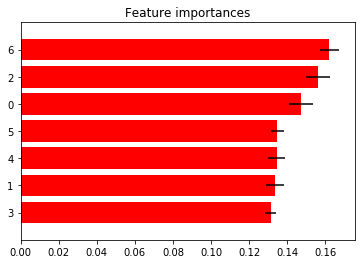

In [28]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()
#FRD: Mkt_Cap	Float	Gap0	pC_1	pC_2	pC_3	V_P 	V1_P	V2_P	V3_P
#Gap7: Mkt_Cap	Float	Gap0	Gap1	pC_1	V1_P 	V_P
#GapUpDown: Mcap	Float	Gap0	Gap1	Gap2	Pchange1	Pchange2	Pchange3	V_1_Float	V_2_Float	V_3_Float	V_Float	Pchange

### First Red Day Variable importance

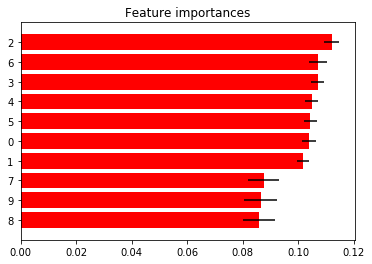

In [70]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()
#FRD: Mkt_Cap	Float	Gap0	pC_1	pC_2	pC_3	V_P 	V1_P	V2_P	V3_P
#Gap: Mkt_Cap	Float	Gap0	pC_1	V_P 	V1_P
#GapUpDown: Mcap	Float	Gap0	Gap1	Gap2	Pchange1	Pchange2	Pchange3	V_1_Float	V_2_Float	V_3_Float	V_Float	Pchange

In [29]:
#Gradiant Boosting Ensemble learning
clf = GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X_train,y_train)
print ('classification score: %s'%(clf.score(X_test, y_test)))
clfP = GradientBoostingClassifier (learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X,y)

classification score: 0.6792535675082327


In [30]:
#regression prep
X = np.array(df_data_reg.drop(['Pchange'],1))
y = np.array(df_data_reg['Pchange'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

#Gradiant Boosting Ensemble learning
clf = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X_train,y_train)
print ('regression score: %s'%(clf.score(X_test, y_test)))
clfP_reg = GradientBoostingRegressor (learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X,y)

regression score: 0.11446216182481594


In [31]:
#pickling predictors
import pickle as pk

with open('GAP7_GB_Classifier.p','wb') as f:
    pk.dump(clfP,f)
with open('GAP7_ET_Classifier.p','wb') as f:
    pk.dump(clfExtra,f)
with open('GAP7_GB_Regressor.p','wb') as f:
    pk.dump(clfP_reg,f)

## Morning Predictions

In [35]:
#pickling predictors
import pickle as pk

clfP = pk.load(open('GAP7_GB_Classifier.p','rb'))
clfExtra = pk.load(open('GAP7_ET_Classifier.p','rb'))
clfP_reg = pk.load(open('GAP7_GB_Regressor.p','rb'))

In [39]:
import datetime
import time
import requests

import json
import pandas as pd
import numpy as np

from datetime import date, timedelta
def prev_weekday(adate):
    '''subtract a day from the given date, then check if the date is a weekday. 
    If not, subtract another, until you do have a weekday'''
    adate -= timedelta(days=1)
    while adate.weekday() > 4: # Mon-Fri are 0-4
        adate -= timedelta(days=1)
    return adate

def symbol_downloader(symbol, days=30, days_ago=0):
    '''take symbol and return volume and price change yesterday'''
    dt = datetime.datetime.now()
    UnixTime = int(time.mktime(dt.timetuple()))
    #web variables
    url = 'https://query1.finance.yahoo.com/v8/finance/chart/'+symbol+'?period1='+str(UnixTime-86400*(days+days_ago))+'&period2='+str(UnixTime-86400*days_ago)+'&interval=1d&indicators=quote%7Csma~60%7Cmfi~14&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-CA&region=CA&corsDomain=ca.finance.yahoo.com'
    #proxies
    http_proxy  = ''
    https_proxy = ''
    ftp_proxy   = ''
    proxyDict = { 
                  "http"  : http_proxy, 
                  "https" : https_proxy, 
                  "ftp"   : ftp_proxy
                }

    hdr = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.101 Safari/537.36',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
       'Connection': 'keep-alive'}
    
    try:
        resp = requests.get(url, headers=hdr)
        if resp.status_code != 200:
            # This means something went wrong.
            print(resp.status_code)
        data = json.loads(resp.text)
        #json unpack
        timestamp = data['chart']['result'][0]['timestamp']
        timestamp = [datetime.datetime.fromtimestamp(x).strftime('%Y%m%d') for x in timestamp]
        quote = data['chart']['result'][0]['indicators']['quote'][0]
        sma60 = data['chart']['result'][0]['indicators']['sma'][0]['sma']
        stock_df = pd.DataFrame(quote)
        #index is symbol and timestamp
        stock_df.index = [str(x) for x in timestamp]
        
        stock_df = stock_df.dropna()
        stock_df = stock_df[~(stock_df == np.inf).any(axis=1)]
        #if request returns legit values
        if len(stock_df) != 0:
            return stock_df
        
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        raise SystemExit(e)

def txt_to_float (amount): 
    '''
    Take text large number with letter suffix, and turn into float
    '''
    try: 
        num_amount = 0.00
        quant = amount[-1]
        amount = amount[:-1]
        if quant == 'T': 
            num_amount = float(amount) * 1000000000000
        elif quant == 'B': 
            num_amount = float(amount) * 1000000000
        elif quant == 'M':
            num_amount = float(amount) * 1000000
        elif quant == 'K':
            num_amount = float(amount) * 1000
        else: 
            num_amount = float(amount)
        return num_amount
    except:
        return 0

In [40]:
import finviz
import gc
gc.collect()

dateTday = date.today().strftime('%Y%m%d')
dateYday = prev_weekday(date.today()).strftime('%Y%m%d')
date2day = prev_weekday(prev_weekday(date.today())).strftime('%Y%m%d')

symbol = 'UMRX'
symbol_df = symbol_downloader(symbol)

vol_yday = symbol_df.loc[dateYday,'volume']/1000000
pChange_yday = (symbol_df.loc[dateYday,'close']-symbol_df.loc[dateYday,'open'])/symbol_df.loc[dateYday,'open']

#current market cap
MarketCap = txt_to_float(finviz.get_stock(symbol)['Market Cap'])/1000000
#Current float
Float = txt_to_float(finviz.get_stock(symbol)['Shs Float'])/1000000
#yesterday's Gapup
gapUp1 = (symbol_df.loc[dateYday,'open']-symbol_df.loc[date2day,'close'])/symbol_df.loc[date2day,'close']
#price increase yesterday - open to close
pC_1 = pChange_yday
#volume yesterday as a % of Float
V1_P = vol_yday/Float

#gap up from close yesterday 
gapUp = 0.1
#volume expected today as a % of Float
V_P = 90/Float

#gapUp = (symbol_df.loc[dateTday,'open']-symbol_df.loc[dateYday,'close'])/symbol_df.loc[dateYday,'close'] #for use intraday

print ('Mkt Cap of {} is: {}'.format(symbol,MarketCap))
print ('Float of {} is: {}'.format(symbol,Float))
print ('Gap up today of {} is: {}'.format(symbol,gapUp))
print ('Gap up yesterday of {} is: {}'.format(symbol,gapUp1))
print ('Price change yesterday of {} is: {}'.format(symbol,pC_1))
print ('V yesterday of {} is: {}'.format(symbol,V1_P))
print ('V today prediction of {} is: {}'.format(symbol,V_P))

predict_list = [MarketCap,Float,gapUp,gapUp1,pC_1,V1_P,V_P]
#Gap7: Mkt_Cap	Float	Gap0	Gap1	pC_1	V1_P 	V_P

Mkt Cap of UMRX is: 112.61
Float of UMRX is: 26.37
Gap up today of UMRX is: 0.1
Gap up yesterday of UMRX is: 0.05980068681976942
Price change yesterday of UMRX is: 0.04075231150171564
V yesterday of UMRX is: 0.5208684110731893
V today prediction of UMRX is: 3.41296928327645


In [41]:
#Float(M), MktCap(M), Yday_v_float, Tday_v_float
print('Gradiant Boosting classification: {}, probabilities: {}'.format(clfP.predict([predict_list]),clfP.predict_proba([predict_list])))
print('Extra Tree classification: {}, probabilities: {}'.format(clfExtra.predict([predict_list]),clfExtra.predict_proba([predict_list])))
print('Gradiant Boosting regression: {}'.format(clfP_reg.predict([predict_list])))

Gradiant Boosting classification: [1], probabilities: [[0.10901862 0.89098138]]
Extra Tree classification: [1], probabilities: [[0.264 0.736]]
Gradiant Boosting regression: [0.39081356]


In [6]:
'''
Backlog: 
-Enable auto logging of predictions with timestamp
-Enable auto scraping of up to date training data
-automate morning screener: https://www.chartmill.com/chartmill-rest/screener/?sort=((preMarketLast/close)%20-%201)%20*%20100&sorting=DESC&conditions=freeFloat%3C50000000,shares*close%3C300000000,shares*close%3E50000000,smaVolume50%20%3E%20200000,etf=0,(preMarketVolume%3E100000)&exchanges=125,119,3&start=0
'''

'\nBacklog: \n-Enable scraping of predictive features from just entering Ticker symbol\n-Enable auto scraping of up to date training data\n'